# DT2470 Lab 02: Teh Machine Learnings

**Group 6: Sergi Andreu and Carsten van de Kamp**


In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Pandas API](https://pandas.pydata.org/docs/reference/index.html#api)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---



**Names: Sergi Andreu and Carsten van de Kamp**

# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

For more information:
- [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html) 

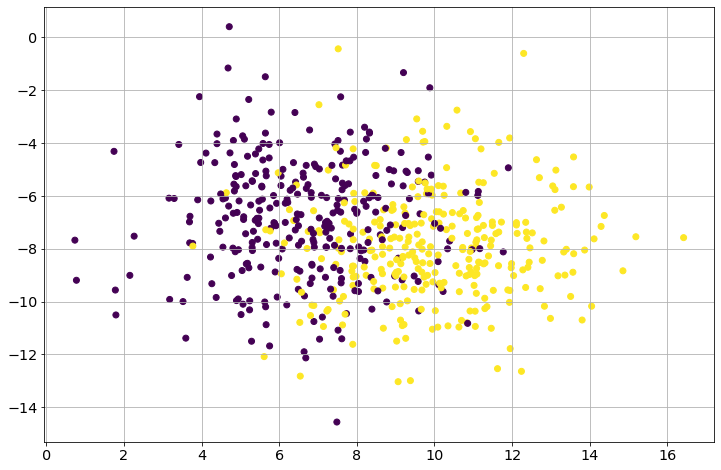

In [1]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [2]:
from sklearn.model_selection import train_test_split
# add your code below

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [3]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

<AxesSubplot:>

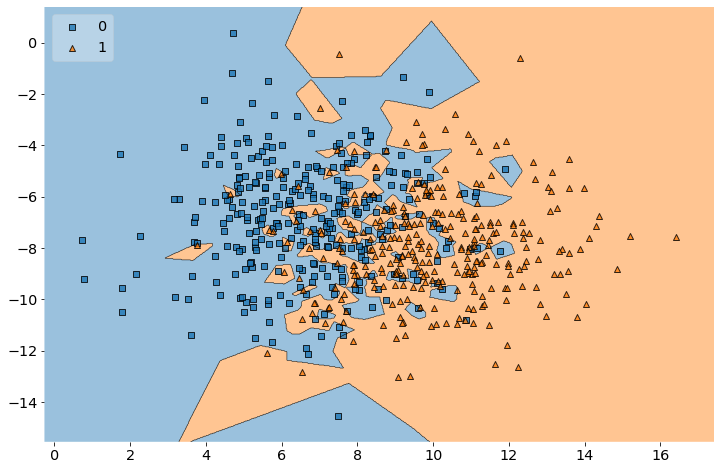

In [4]:
from mlxtend.plotting import plot_decision_regions
# add your code below

plot_decision_regions(X, y, clf=neigh1, legend=2)

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [5]:
# add your code below
y_pred = neigh1.predict(X_test)
print("Predictions: \n", y_pred, "\n")
print("True labels: \n", y_test)

Predictions: 
 [0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 1 0 1 1] 

True labels: 
 [0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 1]


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

[[51 13]
 [13 43]]


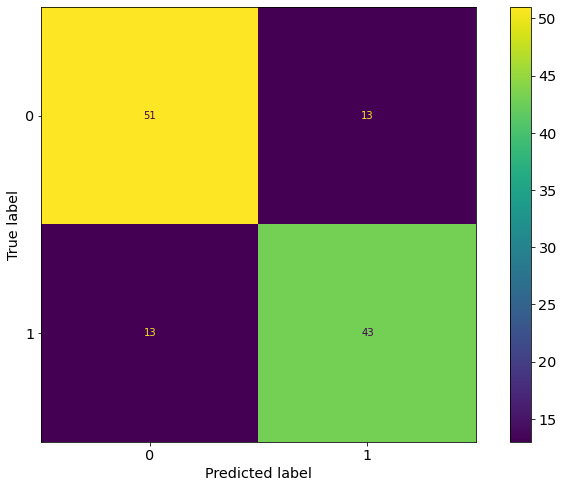

In [6]:
# add your code below
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['0', '1'])
disp.plot()

# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [7]:
from sklearn.metrics import classification_report
# add your code below

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.80      0.80        64
     class 1       0.77      0.77      0.77        56

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120



# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [8]:
# add your code below

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.375)

# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

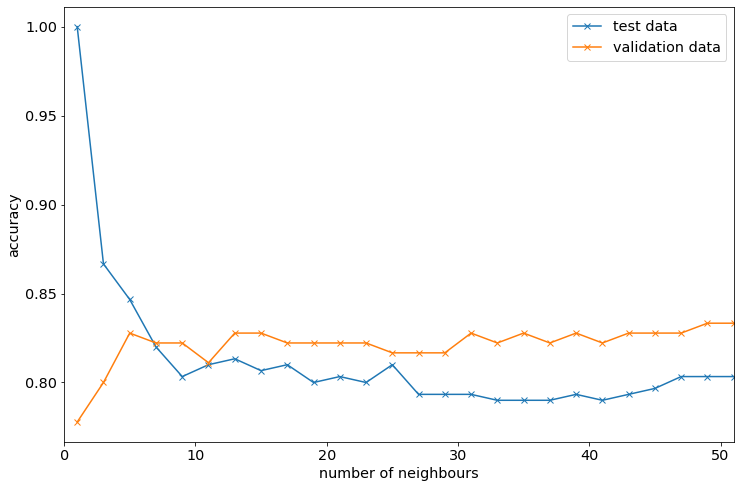

In [9]:
# add your code below

ks = [(2*i + 1) for i in range(26)]

test_acc = []
val_acc = []

for k in ks:
    
    neigh2 = KNeighborsClassifier(n_neighbors=k)
    neigh2.fit(X_train2, y_train2)
    
    test_acc.append(neigh2.score(X_train2, y_train2))
    val_acc.append(neigh2.score(X_val2, y_val2))
    
 
# Plotting
fig, ax = plt.subplots()
ax.plot(ks, test_acc, 'x-', label='test data')
ax.plot(ks, val_acc, 'x-', label='validation data')
ax.set_xlim((0,51))
# ax.set_ylim((0.7,1))
ax.set_xlabel('number of neighbours')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

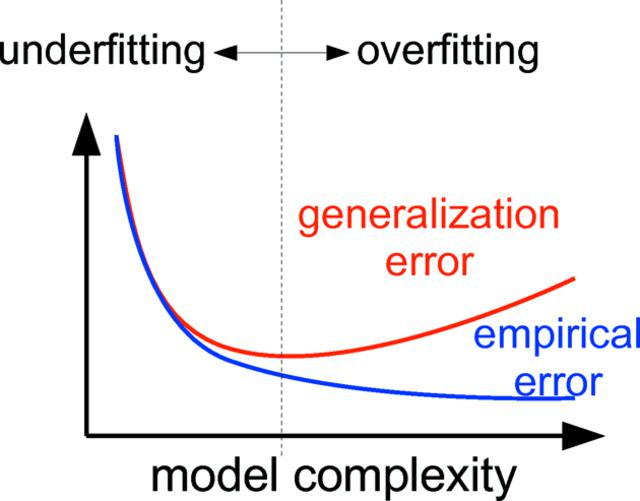

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [10]:
# Determine the best k, which is found where the validation accuracy is maximal. 
# If there are several possible k, we choose the largest value because we favour a smaller model complexity. 
# Small k yields a complex decision boundary, using a small k is prone to overfitting
best_k = np.max(ks[np.argmax(val_acc)])

neigh_best_k = KNeighborsClassifier(n_neighbors=best_k)
neigh_best_k.fit(X_train2, y_train2)

y_pred2 = neigh_best_k.predict(X_test2)
print(f'The best k is {best_k}. \n')
print(classification_report(y_test2, y_pred2, target_names=target_names))

The best k is 49. 

              precision    recall  f1-score   support

     class 0       0.83      0.81      0.82        64
     class 1       0.79      0.80      0.80        56

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

<AxesSubplot:>

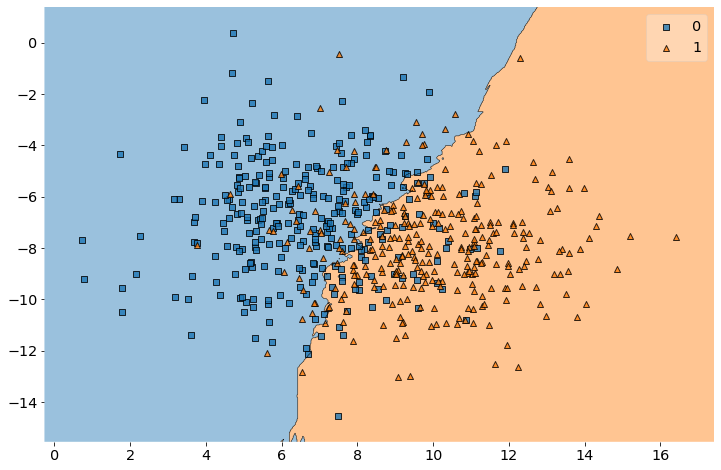

In [11]:
plot_decision_regions(X, y, clf=neigh_best_k)

Compared to the decision boundary in assignment 1.3 we see that this one is much smoother. Therefore we can assume that it generalizes better on unseen data. The non-smoothness in the decision boundary is caused by specific properties in the training data that are unlikely to be found in new unseen data.

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

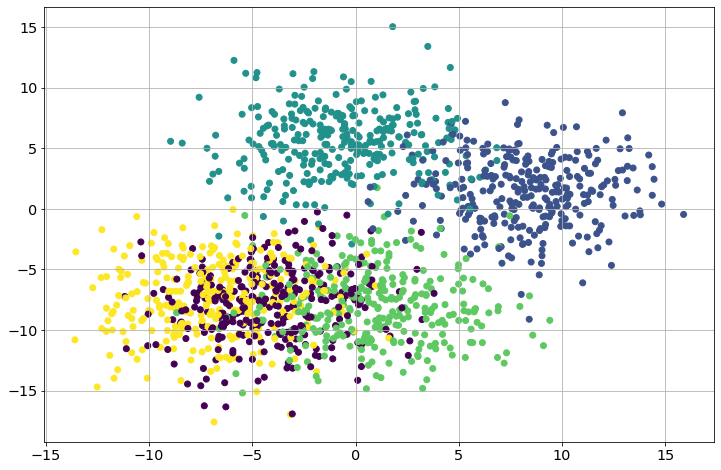

In [12]:
numClasses3 = 5 # number of separate classes
numObservations3 = numClasses3*300 # number of total observations
cluster_std3 = 3 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X3,y3 = datasets.make_blobs(numObservations3,centers=numClasses3,cluster_std=cluster_std3)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X3[:,0],X3[:,1],c=y3)
plt.grid(); plt.show()

In [13]:
# Split the data in a 50/30/20 train/validation/test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.375)

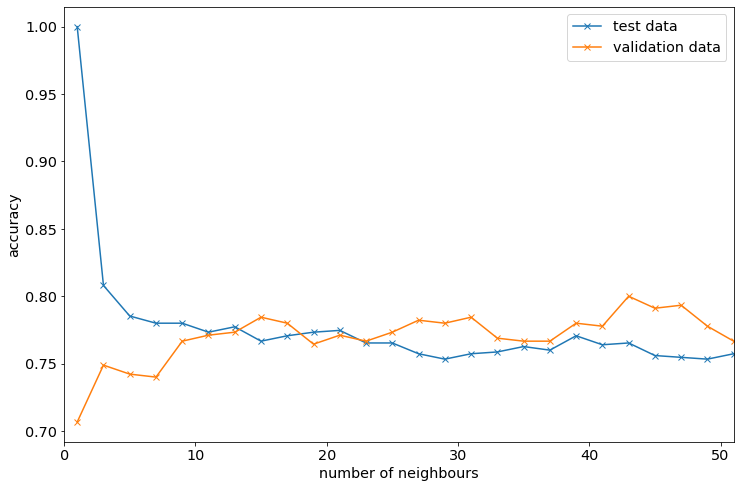

In [14]:
# add your code below

ks = [(2*i + 1) for i in range(26)]

test_acc3 = []
val_acc3 = []

for k in ks:
    
    neigh3 = KNeighborsClassifier(n_neighbors=k)
    neigh3.fit(X_train3, y_train3)
    
    test_acc3.append(neigh3.score(X_train3, y_train3))
    val_acc3.append(neigh3.score(X_val3, y_val3))
    
fig, ax = plt.subplots()
ax.plot(ks, test_acc3, 'x-', label='test data')
ax.plot(ks, val_acc3, 'x-', label='validation data')
ax.set_xlim((0,51))
# ax.set_ylim((0.9,1))
ax.set_xlabel('number of neighbours')
ax.set_ylabel('accuracy')
ax.legend()

In [15]:
# Determine the best k, which is found where the validation accuracy is maximal. 
# If there are several possible k, we choose the largest value because we favour a smaller model complexity. 
# Small k yields a complex decision boundary, using a small k is prone to overfitting
best_k3 = np.max(ks[np.argmax(val_acc3)])

neigh_best_k3 = KNeighborsClassifier(n_neighbors=best_k3)
neigh_best_k3.fit(X_train3, y_train3)

y_pred3 = neigh_best_k3.predict(X_test3)

target_names3 = [f'class {c}' for c in np.arange(0,numClasses3)]
print(f'The best k is {best_k3}. \n')
print(classification_report(y_test3, y_pred3, target_names=target_names3))

The best k is 43. 

              precision    recall  f1-score   support

     class 0       0.50      0.58      0.54        66
     class 1       0.96      0.96      0.96        56
     class 2       0.93      0.93      0.93        55
     class 3       0.80      0.80      0.80        59
     class 4       0.63      0.53      0.58        64

    accuracy                           0.75       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.75      0.75      0.75       300



C:\Users\sergi\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


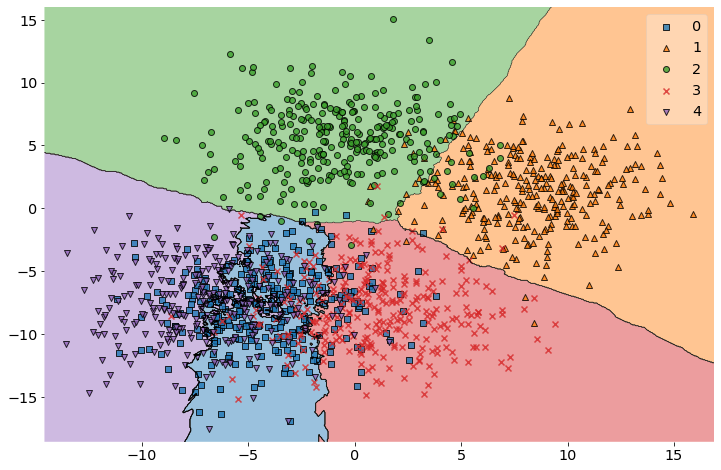

In [16]:
plot_decision_regions(X3, y3, clf=neigh_best_k3)
plt.show()

When the cluster spread increases, then the data sets are more likely to overlap and hence the confusion increases. It is harder for the classifier do determine a good decision boundary (because a hard decision boundary might not exist) and the accuracy is lower. We notice that the optimal $k$ is in general higher compared to the case where there is little overlap.

When there are more classes, then again the probability of overlap between the data cloud from different classes increases, again resulting in less accuracy and a higher optimal $k$. 

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [17]:
def extractZC( data, windowsizeinsamples, windowhopinsamples ):
    totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
    numbersignchanges = []
    for ii in np.arange(totalnumberofwindows):
        windowstart = np.int(ii*windowhopinsamples)
        windowend = np.int(windowstart + windowhopinsamples)
        datasign = np.sign(data[windowstart:windowend])
        datasignderivative = datasign - np.roll(datasign,1)
        numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
    return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
    totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
    centroid = []
    freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
    for ii in np.arange(totalnumberofwindows):
        windowstart = np.int(ii*windowhopinsamples)
        windowend = np.int(windowstart + windowsizeinsamples)
        DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
        centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                        np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
    return np.array(centroid)

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

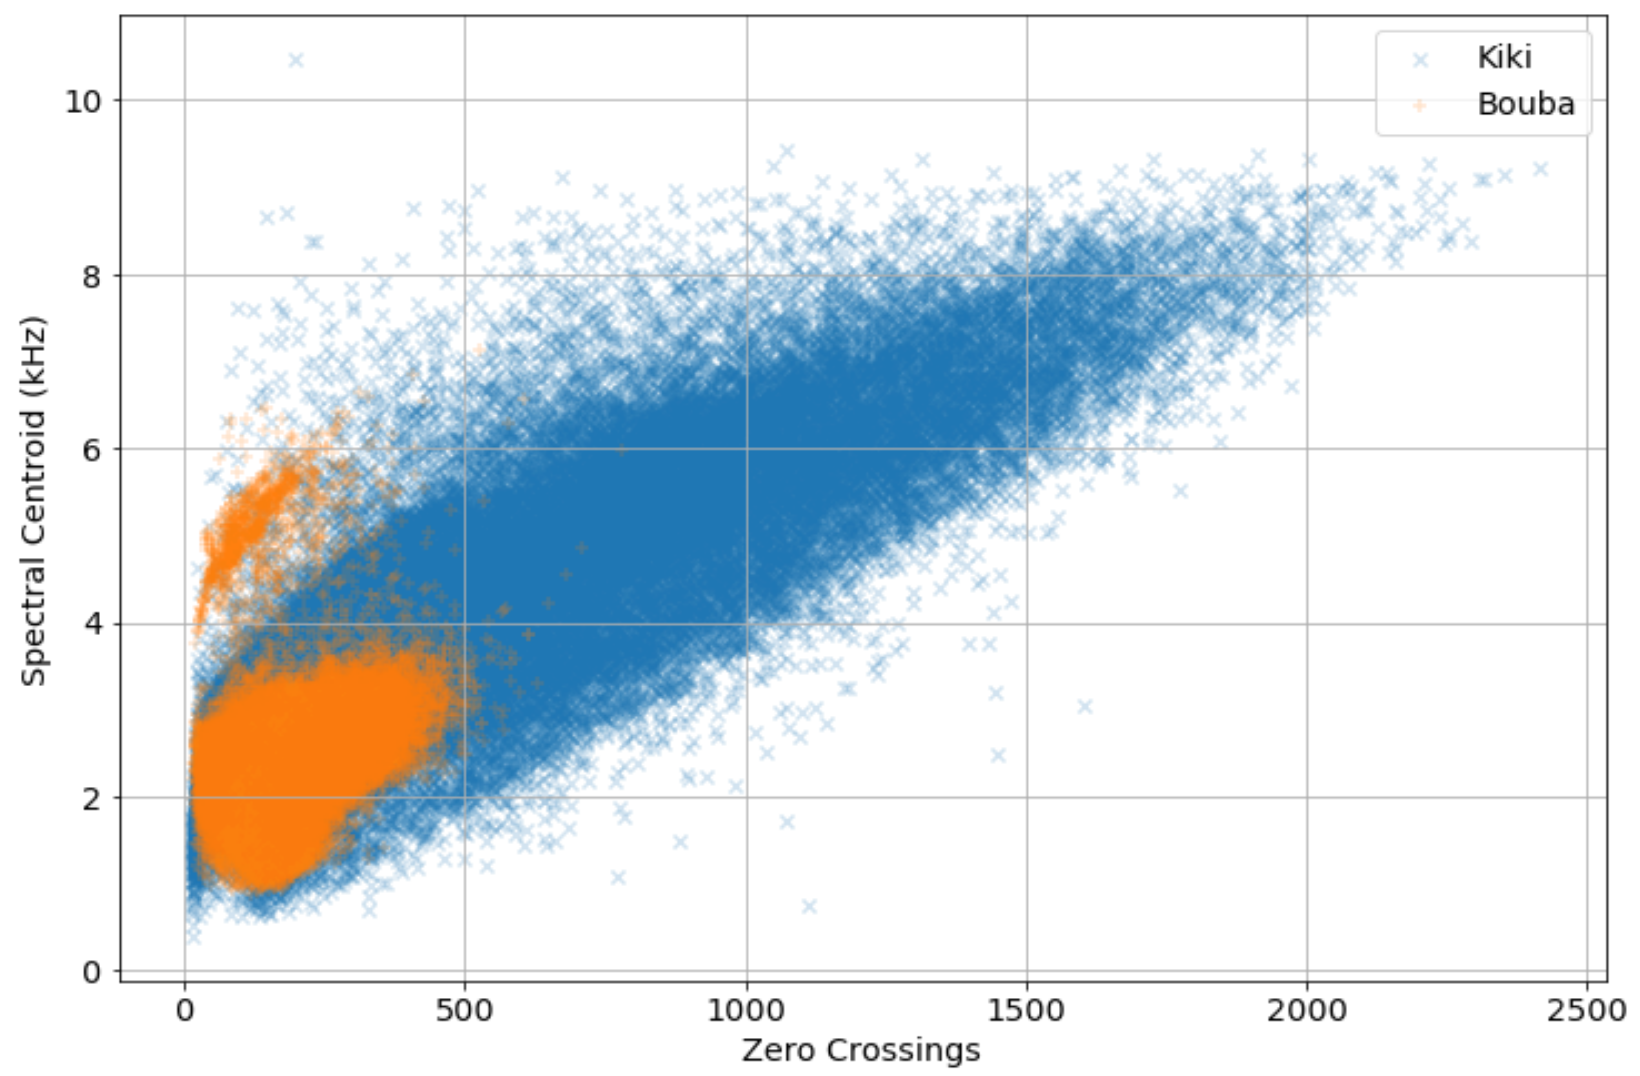

In [18]:
import sys
import os
sys.path.append(os.getcwd())

def extract_features(path, frame_size_seconds, window_hop_seconds):
    ZC_array = np.array([])
    SC_array = np.array([])
    
    for file in os.scandir(path):
        if file.path.endswith(".m4a"):
            print("analyzing ", file.name, file.path)

            sound = pydub.AudioSegment.from_file(path + "/" + file.name, format = "m4a")
            sample_rate = sound.frame_rate

            windowsizeinsamples = frame_size_seconds * sample_rate
            windowhopinsamples =  window_hop_seconds * sample_rate         

            samples = sound.get_array_of_samples()

            ZC = extractZC( samples, windowsizeinsamples, windowhopinsamples )                                     
            SC = extractSC( samples, windowsizeinsamples, windowhopinsamples, sample_rate )

            ZC_array = np.append(ZC_array, ZC)
            SC_array = np.append(SC_array, SC)
        
    return ZC_array, SC_array

In [19]:
# add your code below
import pydub
import os


kiki_train_path  = 'KikiBoubadata/kikibouba_train/kiki'
bouba_train_path = 'KikiBoubadata/kikibouba_train/bouba'

frame_size_seconds = 0.100
window_hop_seconds = 0.100

# Kiki
kiki_train_ZC, kiki_train_SC = extract_features(kiki_train_path, frame_size_seconds, window_hop_seconds)

# Bouba
bouba_train_ZC, bouba_train_SC = extract_features(bouba_train_path, frame_size_seconds, window_hop_seconds)


# Converting Hz to kHz
kiki_train_SC  = kiki_train_SC/1000
bouba_train_SC = bouba_train_SC/1000

analyzing  kiki_0001.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0001.m4a


C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

analyzing  kiki_0002.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0002.m4a
analyzing  kiki_0003.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0003.m4a
analyzing  kiki_0004.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0004.m4a
analyzing  kiki_0005.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0005.m4a
analyzing  kiki_0006.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0006.m4a
analyzing  kiki_0007.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0007.m4a
analyzing  kiki_0008.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0008.m4a
analyzing  kiki_0009.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0009.m4a
analyzing  kiki_0010.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0010.m4a
analyzing  kiki_0011.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0011.m4a
analyzing  kiki_0012.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0012.m4a
analyzing  kiki_0013.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0013.m4a
analyzing  kiki_0014.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0014.m4a
analyzing  kiki_0015.m4a KikiBoubadata

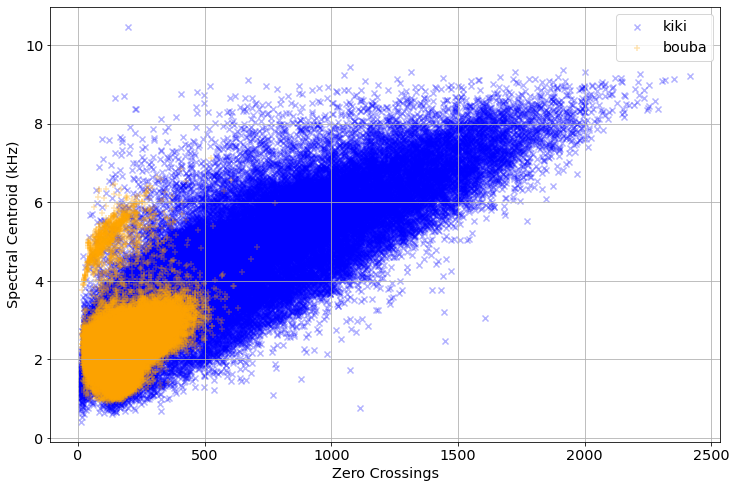

In [20]:
""" 
Plotting
"""

fig, ax = plt.subplots()
ax.scatter(kiki_train_ZC,  kiki_train_SC, c='blue', marker='x', alpha=0.3, label='kiki')
ax.scatter(bouba_train_ZC, bouba_train_SC, c='orange', marker ='+', alpha=0.3, label='bouba')
ax.legend()
ax.set_xlabel('Zero Crossings')
ax.set_ylabel('Spectral Centroid (kHz)')
ax.grid()
#ax.set_xlim((0,2500))
#ax.set_ylim((0,11))

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by setting the parameter "density=True" in either [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) or [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

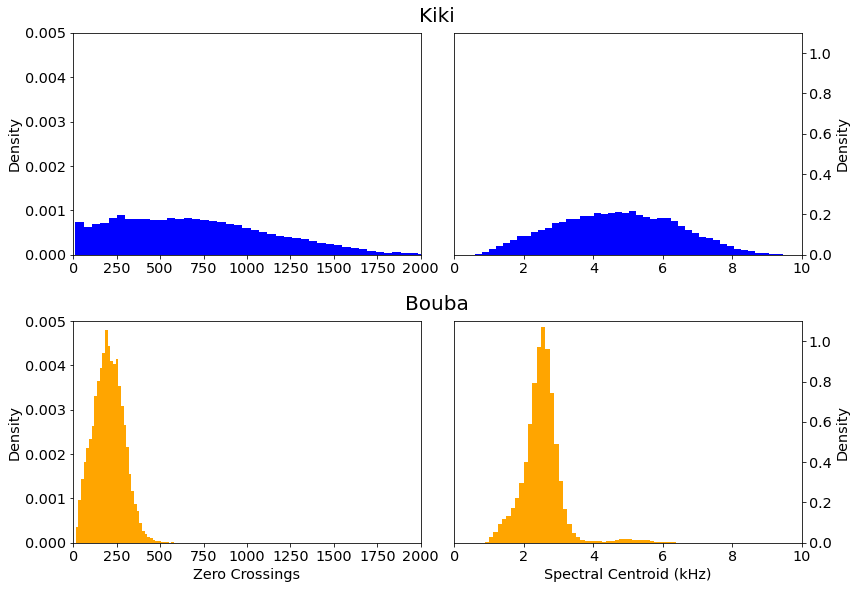

In [21]:
# add your code below

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2)
ax1.hist(kiki_train_ZC,  bins=50, density=True, color='blue')
ax2.hist(kiki_train_SC,  bins=50, density=True, color='blue')
ax3.hist(bouba_train_ZC, bins=50, density=True, color='orange')
ax4.hist(bouba_train_SC, bins=50, density=True, color='orange')

ax1.set_xlim((0,2000))
ax3.set_xlim((0,2000))

ax1.set_ylim((0,.005))
ax3.set_ylim((0,.005))

ax2.set_xlim((0,10))
ax4.set_xlim((0,10))

ax2.set_ylim((0,1.1))
ax4.set_ylim((0,1.1))

ax2.yaxis.tick_right()
ax4.yaxis.tick_right()

ax3.set_xlabel('Zero Crossings')
ax4.set_xlabel('Spectral Centroid (kHz)')

ax1.set_ylabel('Density')
ax2.set_ylabel('Density')
ax2.yaxis.set_label_position("right")
ax3.set_ylabel('Density')
ax4.set_ylabel('Density')
ax4.yaxis.set_label_position("right")

plt.figtext(0.51, 1, "Kiki", ha='center', va='center', fontsize=20)
plt.figtext(0.51, 0.5, "Bouba", ha='center', va='center', fontsize=20)
fig.tight_layout()

plt.subplots_adjust(hspace=.3)  # some extra space for the subtitles
plt.show()

# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
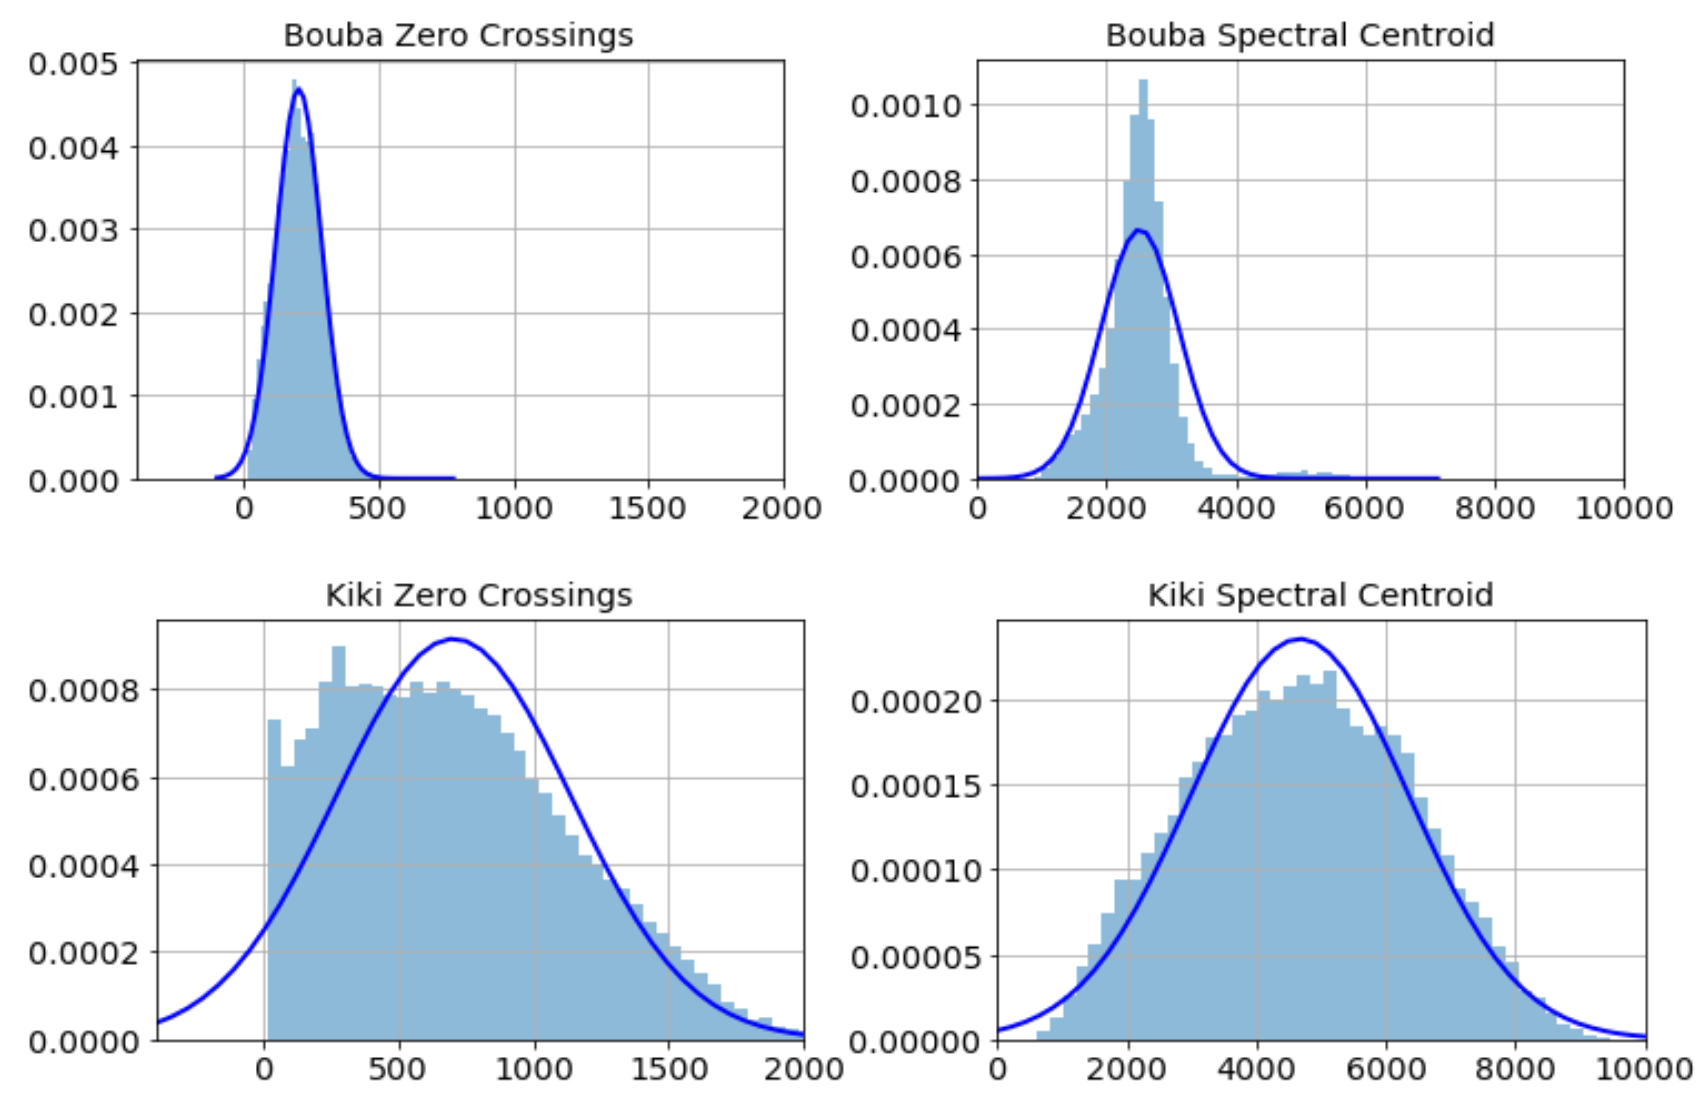

In [22]:
from scipy.stats import norm

# add your code below
kiki_train_ZC_mu  = np.sum(kiki_train_ZC) / len(kiki_train_ZC)
kiki_train_ZC_var = np.sum( (kiki_train_ZC - kiki_train_ZC_mu)**2 ) / (len(kiki_train_ZC) -1)
kiki_train_ZC_gaussfit = lambda x: norm.pdf(x, kiki_train_ZC_mu, kiki_train_ZC_var**(1/2)) 

kiki_train_SC_mu  = np.sum(kiki_train_SC) / len(kiki_train_SC)
kiki_train_SC_var = np.sum( (kiki_train_SC - kiki_train_SC_mu)**2 ) / (len(kiki_train_SC) -1)
kiki_train_SC_gaussfit = lambda x: norm.pdf(x, kiki_train_SC_mu, kiki_train_SC_var**(1/2)) 

bouba_train_ZC_mu  = np.sum(bouba_train_ZC) / len(bouba_train_ZC)
bouba_train_ZC_var = np.sum( (bouba_train_ZC - bouba_train_ZC_mu)**2 ) / (len(bouba_train_ZC) -1)
bouba_train_ZC_gaussfit = lambda x: norm.pdf(x, bouba_train_ZC_mu, bouba_train_ZC_var**(1/2)) 

bouba_train_SC_mu  = np.sum(bouba_train_SC) / len(bouba_train_SC)
bouba_train_SC_var = np.sum( (bouba_train_SC - bouba_train_SC_mu)**2 ) / (len(bouba_train_SC) -1)
bouba_train_SC_gaussfit = lambda x: norm.pdf(x, bouba_train_SC_mu, bouba_train_SC_var**(1/2)) 


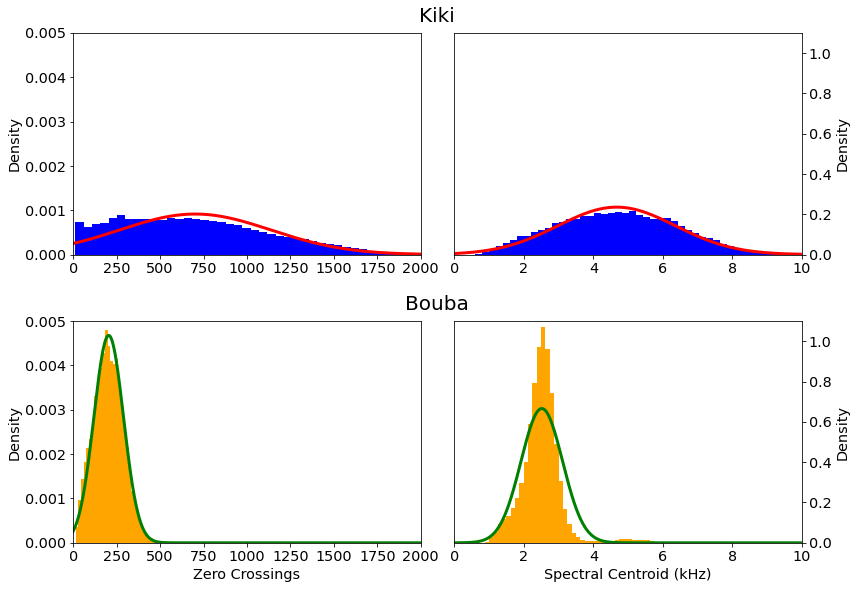

In [23]:
# Plotting


x_ZC = np.linspace(0,2500,num=1000)
x_SC = np.linspace(0,10,  num=1000)

ax1.plot(x_ZC, kiki_train_ZC_gaussfit(x_ZC), 'r-', linewidth=3)
ax2.plot(x_SC, kiki_train_SC_gaussfit(x_SC), 'r-', linewidth=3)

ax3.plot(x_ZC, bouba_train_ZC_gaussfit(x_ZC), 'g-', linewidth=3)
ax4.plot(x_SC, bouba_train_SC_gaussfit(x_SC), 'g-', linewidth=3)

fig

# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio 
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 2$, then according to our model Kiki is twice as likely given $\mathbf{x}$ than Bouba, or Bouba is half as likely as Kiki. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 2$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [24]:
# add your code below

kiki_train_prior  = len(kiki_train_ZC)  / (len(kiki_train_ZC) + len(bouba_train_ZC))
bouba_train_prior = len(bouba_train_ZC) / (len(kiki_train_ZC) + len(bouba_train_ZC))
assert kiki_train_prior + bouba_train_prior == 1

# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 2, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [25]:
# add your code below

def kiki_posterior_odds_greater2(x,
                                 kiki_train_prior = kiki_train_prior,
                                 bouba_train_prior = bouba_train_prior,
                                 kiki_train_ZC_gaussfit = kiki_train_ZC_gaussfit,
                                 kiki_train_SC_gaussfit = kiki_train_SC_gaussfit,
                                 bouba_train_ZC_gaussfit = bouba_train_ZC_gaussfit,
                                 bouba_train_SC_gaussfit = bouba_train_SC_gaussfit):
    """ 
    Compute posterior odds of kiki given a 2D observation x = [num_zero_crossings, spectral_centroid]
    if odds > 2, returns 1 (=Kiki)
    else returns 0 (=Bouba)
    """
    
    prior_ratio = kiki_train_prior / bouba_train_prior
    
    ZC = x[0]
    SC = x[1]
    
    kiki_likelihood  = kiki_train_ZC_gaussfit(ZC)  * kiki_train_SC_gaussfit(SC)
    bouba_likelihood = bouba_train_ZC_gaussfit(ZC) * bouba_train_SC_gaussfit(SC)

    kiki_posterior_odds = kiki_likelihood / bouba_likelihood * prior_ratio
    
    return True if (kiki_posterior_odds > 2) else False

# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

In [26]:
# add your code below

kiki_training_data  = np.stack((kiki_train_ZC, kiki_train_SC), axis=1)
bouba_training_data = np.stack((bouba_train_ZC, bouba_train_SC), axis=1)
training_data = np.concatenate((kiki_training_data, bouba_training_data))

In [27]:
# Predicting labels using classifier

kiki_true_labels  = np.ones( len(kiki_train_ZC),  dtype=bool)
bouba_true_labels = np.zeros(len(bouba_train_ZC), dtype=bool)
true_labels = np.concatenate((kiki_true_labels, bouba_true_labels))

kiki_predicted_labels  = np.array([kiki_posterior_odds_greater2(sample)  for sample in kiki_training_data])
bouba_predicted_labels = np.array([kiki_posterior_odds_greater2(sample)  for sample in bouba_training_data])
predicted_labels = np.concatenate((kiki_predicted_labels, bouba_predicted_labels))


(0.0, 11.0)

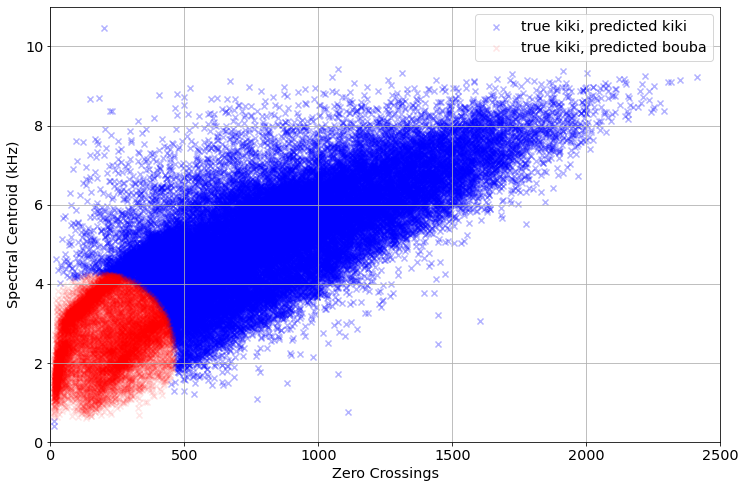

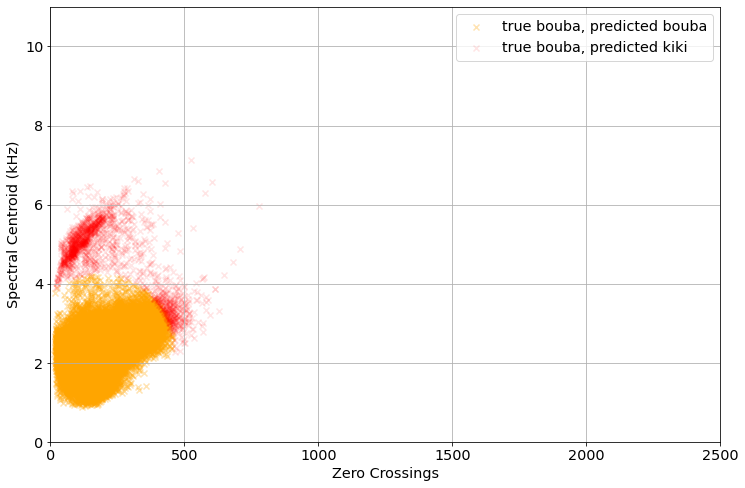

In [28]:
# Plotting
fig1, ax1 = plt.subplots()
ax1.scatter(kiki_training_data[kiki_predicted_labels, 0],
            kiki_training_data[kiki_predicted_labels, 1],
            c='blue', marker='x', alpha=0.3, label='true kiki, predicted kiki')
ax1.scatter(kiki_training_data[~kiki_predicted_labels, 0],
            kiki_training_data[~kiki_predicted_labels, 1],
            c='red', marker='x', alpha=0.1, label='true kiki, predicted bouba')



ax1.legend()
ax1.set_xlabel('Zero Crossings')
ax1.set_ylabel('Spectral Centroid (kHz)')
ax1.grid()
ax1.set_xlim((0,2500))
ax1.set_ylim((0,11))

fig2, ax2 = plt.subplots()
ax2.scatter(bouba_training_data[~bouba_predicted_labels, 0],
            bouba_training_data[~bouba_predicted_labels, 1],
            c='orange', marker='x', alpha=0.3, label='true bouba, predicted bouba')
ax2.scatter(bouba_training_data[bouba_predicted_labels, 0],
            bouba_training_data[bouba_predicted_labels, 1],
            c='red', marker='x', alpha=0.1, label='true bouba, predicted kiki')

ax2.legend()
ax2.set_xlabel('Zero Crossings')
ax2.set_ylabel('Spectral Centroid (kHz)')
ax2.grid()
ax2.set_xlim((0,2500))
ax2.set_ylim((0,11))

# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.

The classifier came up with a clear and hard decision boundary to predict whether a sample belongs to either the Kiki class or the Bouba class. In the scatter plot in 2.1 (true labels) we see that there are some Kikia samples that have the same properties as typical Kiki samples. Our classifier cannot deal with these. 

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

[[51772  1613]
 [11511 34499]]


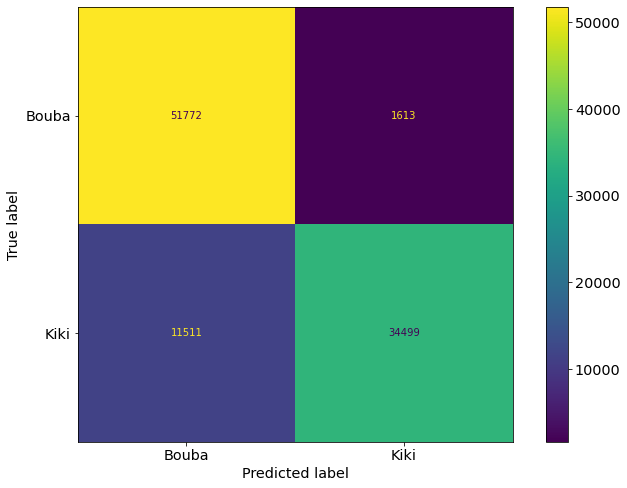

In [29]:
# add your code below

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C = confusion_matrix(true_labels, predicted_labels)
print(C)

disp = ConfusionMatrixDisplay(C, display_labels=['Bouba', 'Kiki'])
disp.plot()

In [56]:
# Compute more performance metrics

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score

accuracy = accuracy_score(true_labels, predicted_labels)
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

print(' TRAINING DATA\n Accuracy: {:.2}, \n Balanced accuracy: {:.2}, \n Precision: {:.2}, \n Recall: {:.2}'
      .format(accuracy, balanced_accuracy, precision, recall))

ValueError: Found input variables with inconsistent numbers of samples: [1500, 99395]

# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.

In [31]:
# Import test data features

bouba_test_path = 'KikiBoubadata/kikibouba_test/bouba'
kiki_test_path  = 'KikiBoubadata/kikibouba_test/kiki'

frame_size_seconds = 0.100
window_hop_seconds = 0.100

# Kiki
kiki_test_ZC, kiki_test_SC = extract_features(kiki_test_path, frame_size_seconds, window_hop_seconds)

# Bouba
bouba_test_ZC, bouba_test_SC = extract_features(bouba_test_path, frame_size_seconds, window_hop_seconds)

# Converting Hz to kHz
kiki_test_SC  = kiki_test_SC/1000
bouba_test_SC = bouba_test_SC/1000

analyzing  kiki_0101.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0101.m4a


C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

analyzing  kiki_0102.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0102.m4a
analyzing  kiki_0103.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0103.m4a
analyzing  kiki_0104.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0104.m4a
analyzing  kiki_0105.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0105.m4a
analyzing  kiki_0106.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0106.m4a
analyzing  kiki_0107.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0107.m4a
analyzing  kiki_0108.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0108.m4a
analyzing  kiki_0109.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0109.m4a
analyzing  kiki_0110.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0110.m4a
analyzing  kiki_0111.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0111.m4a
analyzing  kiki_0112.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0112.m4a
analyzing  kiki_0113.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0113.m4a
analyzing  kiki_0114.m4a KikiBoubadata/kikibouba_test/kiki\kiki_0114.m4a
analyzing  kiki_0115.m4a KikiBoubadata/kikibouba_te

In [32]:
kiki_test_data  = np.stack((kiki_test_ZC, kiki_test_SC), axis=1)
bouba_test_data = np.stack((bouba_test_ZC, bouba_test_SC), axis=1)
test_data = np.concatenate((kiki_test_data, bouba_test_data))

In [33]:
# Predicting labels using classifier

kiki_true_labels_TEST  = np.ones( len(kiki_test_ZC),  dtype=bool)
bouba_true_labels_TEST = np.zeros(len(bouba_test_ZC), dtype=bool)
true_labels_TEST = np.concatenate((kiki_true_labels_TEST, bouba_true_labels_TEST))

kiki_predicted_labels_TEST  = np.array([kiki_posterior_odds_greater2(sample)  for sample in kiki_test_data])
bouba_predicted_labels_TEST = np.array([kiki_posterior_odds_greater2(sample)  for sample in bouba_test_data])
predicted_labels_TEST = np.concatenate((kiki_predicted_labels_TEST, bouba_predicted_labels_TEST))

[[53027  1773]
 [11664 33977]]


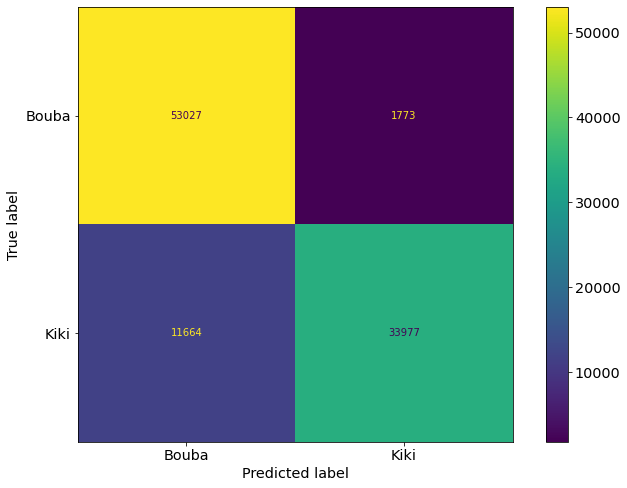

In [34]:
# Confusion table

C_TEST = confusion_matrix(true_labels_TEST, predicted_labels_TEST)
print(C_TEST)

disp = ConfusionMatrixDisplay(C_TEST, display_labels=['Bouba', 'Kiki'])
disp.plot()

In [35]:
# Compute more performance metrics

accuracy_TEST = accuracy_score(true_labels_TEST, predicted_labels_TEST)
balanced_accuracy_TEST = balanced_accuracy_score(true_labels_TEST, predicted_labels_TEST)
precision_TEST = precision_score(true_labels_TEST, predicted_labels_TEST)
recall_TEST = recall_score(true_labels_TEST, predicted_labels_TEST)

print(' TEST DATA\n Accuracy: {:.2}, \n Balanced accuracy: {:.2}, \n Precision: {:.2}, \n Recall: {:.2}'
      .format(accuracy_TEST, balanced_accuracy_TEST, precision_TEST, recall_TEST))

 TEST DATA
 Accuracy: 0.87, 
 Balanced accuracy: 0.86, 
 Precision: 0.95, 
 Recall: 0.74


Again, we see that the classifier performs very well in classifying true Bouba samples as Bouba, with few true Bouba sample classified as Kiki. On the other hand, it classifies true Kiki samples more often as Bouba samples due to the hard decision boundary and overlap between the features. 

We see that all performance metrics (confusion matrix, accuracy, balanced accuracy, precision, recall) on the test data are very comparable to the values we saw on the training data, which is a good sign and shows that we are not overfitting to the training data. 

# 2.10

Discuss several ways you might build a better Kiki-Bouba classifier.

This classifier has two main drawbacks. Most important is that there is no clear decision boundary in the feature space (zero crossings x spectral centroid), making it impossible to have a perfect classifier from the beginning. One could investigate if this issue could be resolved by choosing more and/or different features that can be extracted from the audio samples. This way we might find a certain feature space in which we can draw a clearer and better decicion boundary between the Kiki and Bouba samples. This would especially reduce the number of true Kiki samples that are classified as belonging to the Bouba class. 

One could also check what influence the chosen frame size and hop size have on the classification performance. Perhaps different values would yield a better classifier.

Secondly, the implementation of the classifier can be improved, such that it is faster in predicting which class a sample belongs to.  We expect that getting rid of the for-loop that runs over all samples in the classifier call would yield a big improvement in speed already. Also, one could try to find a way to reduce the number of function calls.

<hr />

A bigger frame size would allow for a more efficient classification, since the frequency resolution would be better. It is also possible that some parts of the audio are silence or it is not possible to distinguish them as being from kiki or bouba. This is resolved by using a bigger frame size.

However, a big frame size would impose a mininum length for the input data. That is, if we use a frame size of 10s, we would only be able to classify between the data if we have an input of at least 10s. This may reduce the number of data, and also make the model less scalable for real-life problems.

We try using a frame size of 10s and a window size of 5s

In [36]:
frame_size_seconds = 10.0
window_hop_seconds = 5.0
    
# Kiki
kiki_train_ZC, kiki_train_SC = extract_features(kiki_train_path, frame_size_seconds, window_hop_seconds)

# Bouba
bouba_train_ZC, bouba_train_SC = extract_features(bouba_train_path, frame_size_seconds, window_hop_seconds)

# Converting Hz to kHz
kiki_train_SC  = kiki_train_SC/1000
bouba_train_SC = bouba_train_SC/1000

analyzing  kiki_0001.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0001.m4a


C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

analyzing  kiki_0002.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0002.m4a
analyzing  kiki_0003.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0003.m4a
analyzing  kiki_0004.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0004.m4a
analyzing  kiki_0005.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0005.m4a
analyzing  kiki_0006.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0006.m4a
analyzing  kiki_0007.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0007.m4a
analyzing  kiki_0008.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0008.m4a
analyzing  kiki_0009.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0009.m4a
analyzing  kiki_0010.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0010.m4a
analyzing  kiki_0011.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0011.m4a
analyzing  kiki_0012.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0012.m4a
analyzing  kiki_0013.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0013.m4a
analyzing  kiki_0014.m4a KikiBoubadata/kikibouba_train/kiki\kiki_0014.m4a
analyzing  kiki_0015.m4a KikiBoubadata

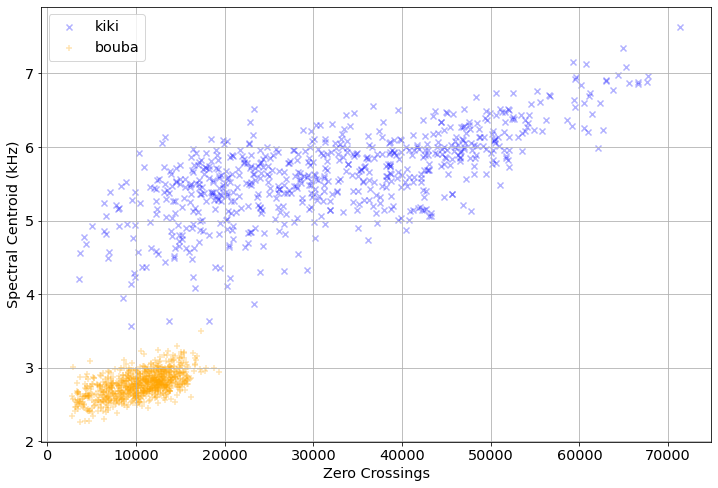

In [37]:
""" 
Plotting
"""

fig, ax = plt.subplots()
ax.scatter(kiki_train_ZC,  kiki_train_SC, c='blue', marker='x', alpha=0.3, label='kiki')
ax.scatter(bouba_train_ZC, bouba_train_SC, c='orange', marker ='+', alpha=0.3, label='bouba')
ax.legend()
ax.set_xlabel('Zero Crossings')
ax.set_ylabel('Spectral Centroid (kHz)')
ax.grid()

We can see that now the data is separable. However, in the tradeoff we have risked being able to not use all data, and to only be able to classify samples of at least 10s.

Also, more features could be introduced so as to achieve a better classification. It is however not easy to do feature engineering, specially without having taken a look into the data.
One could start by plotting two signals (one from Kiki and one from Bouba) and compare them visually.

C:\Users\sergi\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\sergi\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


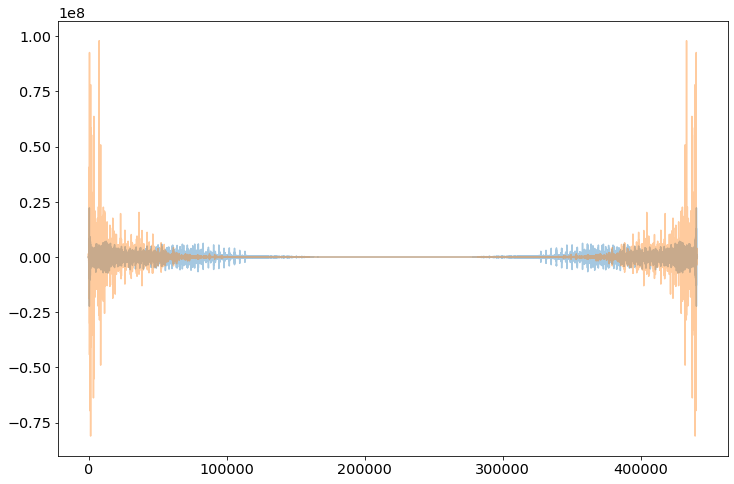

In [38]:
bouba_test_path = 'KikiBoubadata/kikibouba_test/bouba'
kiki_test_path  = 'KikiBoubadata/kikibouba_test/kiki'

import sys
sys.path.append(os.getcwd())

bouba_test_paths = [file.name for file in os.scandir(bouba_test_path)]
kiki_test_paths = [file.name for file in os.scandir(kiki_test_path)]

ind_kiki = 10
ind_bouba = 14
window_idx = 18

file_name_kiki = kiki_test_paths[ind_kiki]
file_name_bouba = bouba_test_paths[ind_bouba]

sound_kiki = pydub.AudioSegment.from_file(kiki_test_path + "/" + file_name_kiki, format = "m4a")
sound_bouba = pydub.AudioSegment.from_file(bouba_test_path + "/" + file_name_bouba, format = "m4a")

sample_rate_kiki = sound_kiki.frame_rate
sample_rate_bouba = sound_bouba.frame_rate

windowsizeinsamples_kiki = frame_size_seconds * sample_rate_kiki
windowsizeinsamples_bouba = frame_size_seconds * sample_rate_bouba

windowhopinsamples_kiki =  window_hop_seconds * sample_rate_kiki  
windowhopinsamples_bouba =  window_hop_seconds * sample_rate_bouba         

samples_kiki = sound_kiki.get_array_of_samples()
samples_bouba = sound_bouba.get_array_of_samples()

totalnumberofwindows_kiki = np.floor((len(samples_kiki)-windowsizeinsamples_kiki)/windowhopinsamples_kiki)
totalnumberofwindows_bouba = np.floor((len(samples_bouba)-windowsizeinsamples_bouba)/windowhopinsamples_bouba)

fft_kiki = np.fft.fft(samples_kiki[:int(windowsizeinsamples_kiki)])
fft_bouba = np.fft.fft(samples_bouba[:int(windowsizeinsamples_bouba)])

plt.plot(fft_kiki, alpha=0.4)
plt.plot(fft_bouba, alpha=0.4)


The spectral centroid seems a good feature for this case. However, it also seems that the variance of the frequencies may play an important role in the classification, since the frequencies of Kiki seem to be more spread (and variance is a measure of how spread it's a signal). We therefore want to extract the Spectral Variance.

In [39]:
def extractSV( data, windowsizeinsamples, windowhopinsamples, samplerate ):
    
    totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
    variance = []
    
    freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
    #freqs = np.power(freqs, trypower)

    for ii in np.arange(totalnumberofwindows):
        windowstart = np.int(ii*windowhopinsamples)
        windowend = np.int(windowstart + windowsizeinsamples)
        DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
        
        """ 
        centroid = np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])
            
        second_moment = np.sum(np.square(freqs)*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])
            
        variance.append( np.subtract(second_moment , centroid)
        """
        
        ind_max = int(np.ceil(windowsizeinsamples/2.0)+1)
        
        centroid = np.sum(freqs*DATA[:ind_max])/np.sum(DATA[:ind_max])
        
        second_moment = np.sum(np.power(freqs, 2)*DATA[:ind_max])/np.sum(DATA[:ind_max])
        
        variance.append(second_moment - np.power(centroid,2))
        
    return np.array(variance)


import sys
sys.path.append(os.getcwd())

def extract_features_2(path, frame_size_seconds, window_hop_seconds):
    ZC_array = np.array([])
    SC_array = np.array([])
    SV_array = np.array([])
    
    for file in os.scandir(path):
        if file.path.endswith(".m4a"):

            sound = pydub.AudioSegment.from_file(path + "/" + file.name, format = "m4a")
            sample_rate = sound.frame_rate

            windowsizeinsamples = frame_size_seconds * sample_rate
            windowhopinsamples =  window_hop_seconds * sample_rate         

            samples = sound.get_array_of_samples()

            ZC = extractZC( samples, windowsizeinsamples, windowhopinsamples )                                     
            SC = extractSC( samples, windowsizeinsamples, windowhopinsamples, sample_rate )
            SV = extractSV( samples, windowsizeinsamples, windowhopinsamples, sample_rate )
            
            ZC_array = np.append(ZC_array, ZC)
            SC_array = np.append(SC_array, SC)
            SV_array = np.append(SV_array, SV)
        
    return ZC_array, SC_array, SV_array

A good approach would be to use those three variables. However, we only replace the Spectral Centroid with Spectral Variance, and see if we observe better results. 

In [40]:
# add your code below
import pydub
import os

kiki_train_path  = 'KikiBoubadata/kikibouba_train/kiki'
bouba_train_path = 'KikiBoubadata/kikibouba_train/bouba'

frame_size_seconds = 10.0
window_hop_seconds = 5.0
    
# Kiki
kiki_train_ZC, kiki_train_SC, kiki_train_SV = extract_features_2(kiki_train_path, frame_size_seconds, window_hop_seconds)

# Bouba
bouba_train_ZC, bouba_train_SC, bouba_train_SV = extract_features_2(bouba_train_path, frame_size_seconds, window_hop_seconds)

print(np.shape(kiki_train_SV))
print(np.shape(kiki_train_SC))
# Converting Hz to kHz
kiki_train_SC  = kiki_train_SC/1000
bouba_train_SC = bouba_train_SC/1000
kiki_train_SV = kiki_train_SV/np.power(1000, 2)
bouba_train_SV = bouba_train_SV/np.power(1000, 2)

C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

(673,)
(673,)


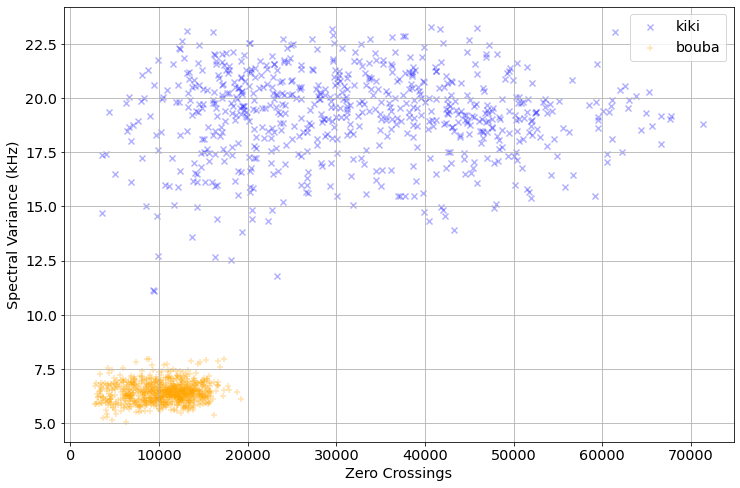

In [41]:
""" 
Plotting
"""

fig, ax = plt.subplots()
ax.scatter(kiki_train_ZC,  kiki_train_SV, c='blue', marker='x', alpha=0.3, label='kiki')
ax.scatter(bouba_train_ZC, bouba_train_SV, c='orange', marker ='+', alpha=0.3, label='bouba')
ax.legend()
ax.set_xlabel('Zero Crossings')
ax.set_ylabel('Spectral Variance (kHz)')
ax.grid()

Where now the classification seems to be a bit easier than before. We can reuse some of the code:

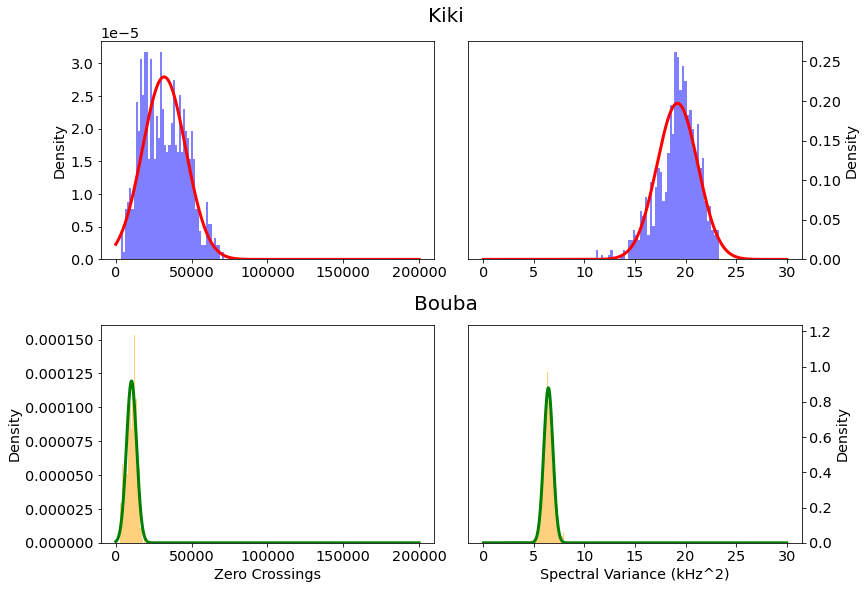

In [42]:
# add your code below

kiki_train_ZC_mu  = np.sum(kiki_train_ZC) / len(kiki_train_ZC)
kiki_train_ZC_var = np.sum( (kiki_train_ZC - kiki_train_ZC_mu)**2 ) / (len(kiki_train_ZC) -1)
kiki_train_ZC_gaussfit = lambda x: norm.pdf(x, kiki_train_ZC_mu, kiki_train_ZC_var**(1/2)) 

kiki_train_SV_mu  = np.sum(kiki_train_SV) / len(kiki_train_SV)
kiki_train_SV_var = np.sum( (kiki_train_SV - kiki_train_SV_mu)**2 ) / (len(kiki_train_SV) -1)
kiki_train_SV_gaussfit = lambda x: norm.pdf(x, kiki_train_SV_mu, kiki_train_SV_var**(1/2)) 

bouba_train_ZC_mu  = np.sum(bouba_train_ZC) / len(bouba_train_ZC)
bouba_train_ZC_var = np.sum( (bouba_train_ZC - bouba_train_ZC_mu)**2 ) / (len(bouba_train_ZC) -1)
bouba_train_ZC_gaussfit = lambda x: norm.pdf(x, bouba_train_ZC_mu, bouba_train_ZC_var**(1/2)) 

bouba_train_SV_mu  = np.sum(bouba_train_SV) / len(bouba_train_SV)
bouba_train_SV_var = np.sum( (bouba_train_SV - bouba_train_SV_mu)**2 ) / (len(bouba_train_SV) -1)
bouba_train_SV_gaussfit = lambda x: norm.pdf(x, bouba_train_SV_mu, bouba_train_SV_var**(1/2)) 

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2)
ax1.hist(kiki_train_ZC,  bins=50, density=True, color='blue', alpha=0.5)
ax2.hist(kiki_train_SV,  bins=50, density=True, color='blue', alpha=0.5)
ax3.hist(bouba_train_ZC, bins=50, density=True, color='orange', alpha=0.5)
ax4.hist(bouba_train_SV, bins=50, density=True, color='orange', alpha=0.5)

ax2.yaxis.tick_right()
ax4.yaxis.tick_right()

ax3.set_xlabel('Zero Crossings')
ax4.set_xlabel('Spectral Variance (kHz^2)')

ax1.set_ylabel('Density')
ax2.set_ylabel('Density')
ax2.yaxis.set_label_position("right")
ax3.set_ylabel('Density')
ax4.set_ylabel('Density')
ax4.yaxis.set_label_position("right")

plt.figtext(0.51, 1, "Kiki", ha='center', va='center', fontsize=20)
plt.figtext(0.51, 0.5, "Bouba", ha='center', va='center', fontsize=20)
fig.tight_layout()

plt.subplots_adjust(hspace=.3)  # some extra space for the subtitles

x_ZC = np.linspace(0,2e5,num=1000)
x_SV = np.linspace(0,30,  num=1000)

ax1.plot(x_ZC, kiki_train_ZC_gaussfit(x_ZC), 'r-', linewidth=3)
ax2.plot(x_SV, kiki_train_SV_gaussfit(x_SV), 'r-', linewidth=3)

ax3.plot(x_ZC, bouba_train_ZC_gaussfit(x_ZC), 'g-', linewidth=3)
ax4.plot(x_SV, bouba_train_SV_gaussfit(x_SV), 'g-', linewidth=3)


We could find an analytical solution for the decision boundary of the problem by equating

$$ \frac{\exp\{-\frac{1}{2}(x-\mu_{1,k})^2 / \beta_{1,k}\}\exp\{-\frac{1}{2}(y-\mu_{2,k})^2 / \beta_{2,k}\}}{\sqrt{2\pi \beta_{1,k}}\sqrt{2\pi \beta_{2,k}}} P_k =  \frac{\exp\{-\frac{1}{2}(x-\mu_{1,b})^2 / \beta_{1,b}\}\exp\{-\frac{1}{2}(y-\mu_{2,b})^2 /\beta_{2,b}\}}{\sqrt{2\pi \beta_{1,b}}\sqrt{2\pi \beta_{2,b}}} P_b$$

Where $x$ is SV, $y$ is ZV, $\mu_{1,k}$, $\mu_{2,k}$ are the means for kiki for the SV and ZC respectively, and $\beta_{1,k}$, $\beta_{2,k}$ the variances for SV and ZC, and $P_k$, $P_b$ are the priors. The variables with a subindex $b$ refer to Bouba. We get

This is however difficult to solve analytically. However, the log-likelihoodis far better to get. A sample with SV=x and ZC=y would be classified as k whenever


$$\log\left( \frac{\exp\{-\frac{1}{2}(x-\mu_{1,k})^2 / \beta_{1,k}\}\exp\{-\frac{1}{2}(y-\mu_{2,k})^2 / \beta_{2,k}\}}{\sqrt{2\pi \beta_{1,k}}\sqrt{2\pi \beta_{2,k}}} P_k \right) > \log \left( \frac{\exp\{-\frac{1}{2}(x-\mu_{1,b})^2 / \beta_{1,b}\}\exp\{-\frac{1}{2}(y-\mu_{2,b})^2 /\beta_{2,b}\}}{\sqrt{2\pi \beta_{1,b}}\sqrt{2\pi \beta_{2,b}}} P_b\right)$$


That can be converted into

$$-\frac{1}{2}\left[(x-\mu_{1,k})^2 /\beta_{1,k}+(y-\mu_{2,k})^2 / \beta_{2,k} - (x-\mu_{1,b})^2 / \beta_{1,b} - (y-\mu_{2,b})^2 /\beta_{2,b}\right] > $$
$$> \log(P_b/P_k) +\log((\beta_{1,k}\beta_{2,k})/(\beta_{1,b}\beta_{2,b})) $$

which is an easier function to evaluate, and also easier to vectorize.

In [43]:
mu1k = kiki_train_SV_mu
mu2k = kiki_train_ZC_mu
beta1k = kiki_train_SV_var
beta2k = kiki_train_ZC_var

mu1b = bouba_train_SV_mu
mu2b = bouba_train_ZC_mu
beta1b = bouba_train_SV_var
beta2b = bouba_train_ZC_var

kiki_train_prior  = len(kiki_train_ZC)  / (len(kiki_train_ZC) + len(bouba_train_ZC))
bouba_train_prior = len(bouba_train_ZC) / (len(kiki_train_ZC) + len(bouba_train_ZC))
assert kiki_train_prior + bouba_train_prior == 1

prior_ratio = kiki_train_prior / bouba_train_prior

term2 = -np.log(prior_ratio) +np.log((beta1k*beta2k)/(beta1b*beta2b))

def Term1(x,y):
    
    term1 = (x-mu1k)**2/beta1k + (y-mu2k)**2/beta2k - (x-mu1b)**2/beta1b -(y-mu2b)**2/beta2b
    
    return term1

Term1 = np.vectorize(Term1)

In [44]:
# add your code below

kiki_training_data  = np.stack((kiki_train_ZC, kiki_train_SV), axis=1)
bouba_training_data = np.stack((bouba_train_ZC, bouba_train_SV), axis=1)
training_data = np.concatenate((kiki_training_data, bouba_training_data))

kiki_true_labels  = np.ones( len(kiki_train_ZC),  dtype=bool)
bouba_true_labels = np.zeros(len(bouba_train_ZC), dtype=bool)
true_labels = np.concatenate((kiki_true_labels, bouba_true_labels))

kiki_training_data_x = kiki_training_data[:,1]
kiki_training_data_y = kiki_training_data[:,0]

bouba_training_data_x = bouba_training_data[:,1]
bouba_training_data_y = bouba_training_data[:,0]

kiki_term1 = Term1(kiki_training_data_x, kiki_training_data_y)
kiki_predicted_labels = -0.5*kiki_term1 > term2

bouba_term1 = Term1(bouba_training_data_x, bouba_training_data_y)
bouba_predicted_labels = -0.5*bouba_term1 > term2

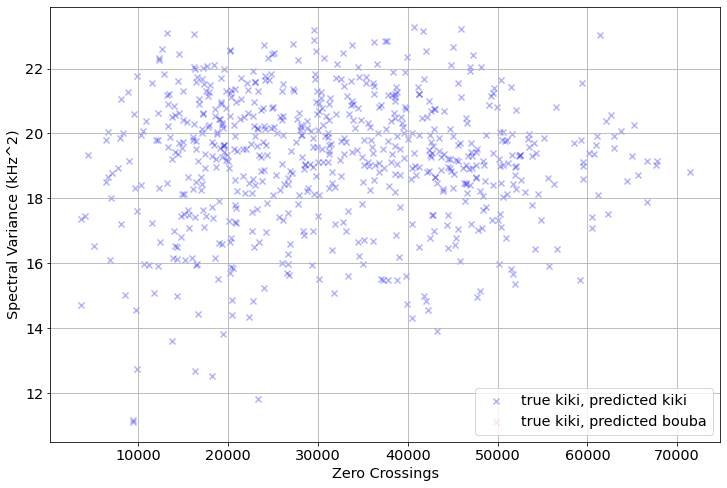

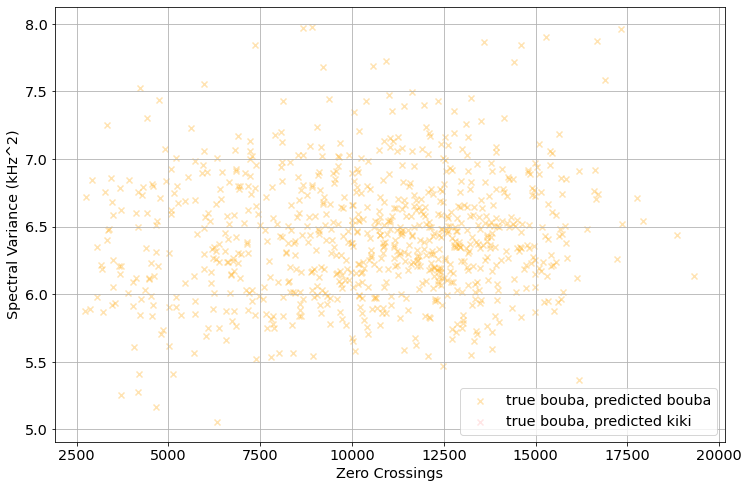

In [45]:
# Plotting
fig1, ax1 = plt.subplots()
ax1.scatter(kiki_training_data[kiki_predicted_labels, 0],
            kiki_training_data[kiki_predicted_labels, 1],
            c='blue', marker='x', alpha=0.3, label='true kiki, predicted kiki')
ax1.scatter(kiki_training_data[~kiki_predicted_labels, 0],
            kiki_training_data[~kiki_predicted_labels, 1],
            c='red', marker='x', alpha=0.1, label='true kiki, predicted bouba')


ax1.legend()
ax1.set_xlabel('Zero Crossings')
ax1.set_ylabel('Spectral Variance (kHz^2)')
ax1.grid()

fig2, ax2 = plt.subplots()
ax2.scatter(bouba_training_data[~bouba_predicted_labels, 0],
            bouba_training_data[~bouba_predicted_labels, 1],
            c='orange', marker='x', alpha=0.3, label='true bouba, predicted bouba')
ax2.scatter(bouba_training_data[bouba_predicted_labels, 0],
            bouba_training_data[bouba_predicted_labels, 1],
            c='red', marker='x', alpha=0.1, label='true bouba, predicted kiki')

ax2.legend()
ax2.set_xlabel('Zero Crossings')
ax2.set_ylabel('Spectral Variance (kHz^2)')
ax2.grid()

We can now try with the test data

In [47]:
bouba_test_path = 'KikiBoubadata/kikibouba_test/bouba'
kiki_test_path  = 'KikiBoubadata/kikibouba_test/kiki'

frame_size_seconds = 10.0
window_hop_seconds = 5.0

# Kiki
kiki_test_ZC, kiki_test_SC, kiki_test_SV = extract_features_2(kiki_test_path, frame_size_seconds, window_hop_seconds)

# Bouba
bouba_test_ZC, bouba_test_SC, bouba_test_SV = extract_features_2(bouba_test_path, frame_size_seconds, window_hop_seconds)

# Converting Hz to kHz
kiki_test_SC  = kiki_test_SC/1000
bouba_test_SC = bouba_test_SC/1000

kiki_test_SV = kiki_test_SV/np.power(1000,2)
bouba_test_SV = bouba_test_SV/np.power(1000,2)

C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  windowstart = np.int(ii*windowhopinsamples)
C:\Users\sergi\AppData\Local\Temp/ipykernel_20432/3852559072.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [53]:
kiki_test_data  = np.stack((kiki_test_ZC, kiki_test_SV), axis=1)
bouba_test_data = np.stack((bouba_test_ZC, bouba_test_SV), axis=1)
test_data = np.concatenate((kiki_test_data, bouba_test_data))

In [54]:
# Predicting labels using classifier

kiki_true_labels_TEST  = np.ones( len(kiki_test_ZC),  dtype=bool)
bouba_true_labels_TEST = np.zeros(len(bouba_test_ZC), dtype=bool)
true_labels_TEST = np.concatenate((kiki_true_labels_TEST, bouba_true_labels_TEST))


kiki_test_data_x = kiki_test_data[:,1]
kiki_test_data_y = kiki_test_data[:,0]

bouba_test_data_x = bouba_test_data[:,1]
bouba_test_data_y = bouba_test_data[:,0]

kiki_term1 = Term1(kiki_test_data_x, kiki_test_data_y)
kiki_predicted_labels_TEST = -0.5*kiki_term1 > term2

bouba_term1 = Term1(bouba_test_data_x, bouba_test_data_y)
bouba_predicted_labels_TEST = -0.5*bouba_term1 > term2

predicted_labels_TEST = np.concatenate((kiki_predicted_labels_TEST, bouba_predicted_labels_TEST))

[[854   0]
 [  1 666]]


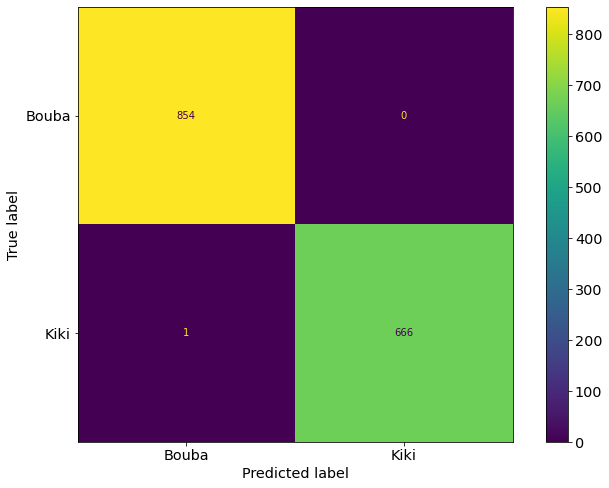

In [55]:
# Confusion table

C_TEST = confusion_matrix(true_labels_TEST, predicted_labels_TEST)
print(C_TEST)

disp = ConfusionMatrixDisplay(C_TEST, display_labels=['Bouba', 'Kiki'])
disp.plot()

We get better results at the cost of needing longer samples (at least 10s) and with more computing time (since computing the variance is more costly than computing the mean).